In [26]:
import pandas as pd 
import numpy as np

df_raw=pd.read_excel("C:/Users/abhi_/Downloads/dummy.xlsx")
df = df_raw.copy()
print(df.head())
df.info()
print(df.describe())

   Year              Territory Industry Sector State/Province Country  \
0  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
1  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
2  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
3  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
4  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   

  Product Segment        Product Group  Trade Sales Quantity  \
0   COLOR SAMPLES        COLOR SAMPLES            -64.000000   
1      COMMERCIAL   CORONADO SPECIALTY              0.000000   
2      COMMERCIAL  ULTRA SPEC INTERIOR              0.333333   
3      COMMERCIAL  ULTRA SPEC INTERIOR              0.000000   
4       COMMODITY  SUPER HIDE MOOREPRO              7.000000   

   Trade Sales Gallons  Trade Sales Dollars (Group)  \
0            -2.158929                  -488.248889   
1             0.000000                     0.000000   
2          

In [27]:
# column values
text_cols=["Territory","Industry Sector","State/Province","Country","Product Segment","Product Group"]
for col in text_cols:
    if col in df.columns:
        df[col]=df[col].astype(str).str.strip().replace({"nan": np.nan, "None": np.nan})
num_cols=["Trade Sales Quantity","Trade Sales Gallons","Trade Sales Dollars (Group)"]
for col in num_cols:
    if col in df.columns:
        df[col]=pd.to_numeric(df[col],errors='coerce')

# column labels
df.columns= df.columns.str.lower()
df.columns= df.columns.str.replace(' ','_')
df= df.rename(columns={'trade_sales_dollars_(group)':'trade_sales_dollars', 'state/province':'state'})
df.columns

Index(['year', 'territory', 'industry_sector', 'state', 'country',
       'product_segment', 'product_group', 'trade_sales_quantity',
       'trade_sales_gallons', 'trade_sales_dollars', 'product_line'],
      dtype='object')

In [28]:
# features
df["market"] = np.where(
    df["country"] == "USA",
    "USA",
    np.where(df["country"] == "CANADA", "CANADA", "INTERNATIONAL")
)

df["price_per_gallon"] = np.where(
    df["trade_sales_gallons"] > 0,
    df["trade_sales_dollars"] / df["trade_sales_gallons"],
    np.nan
)


In [32]:
df["sale_type"] = np.where(
    df["trade_sales_dollars"] > 0,
    "Revenue",
    "Adjustment"
)

In [33]:
df.columns

Index(['year', 'territory', 'industry_sector', 'state', 'country',
       'product_segment', 'product_group', 'trade_sales_quantity',
       'trade_sales_gallons', 'trade_sales_dollars', 'product_line', 'market',
       'price_per_gallon', 'sale_type'],
      dtype='object')

In [7]:
pip install psycopg2-binary sqlalchemy

Note: you may need to restart the kernel to use updated packages.


In [30]:
from sqlalchemy import create_engine

# Step 1: Connect to PostgreSQL
username="postgres"
password="1234"
host="localhost"
port="5432"
database="sales_analysis"

engine=create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

# Step 2: Load DataFrame into PostgreSQL
table_name="dummy"
df.to_sql(table_name,engine,if_exists="replace",index=False)

print(f"Data successfully loaded into table '{table_name}' in database '{database}'.")

Data successfully loaded into table 'dummy' in database 'sales_analysis'.


In [14]:
for c in check_cols:
    if c in df.columns:
        print(c, "-", df[c].isna().sum())

NameError: name 'check_cols' is not defined

In [41]:
print(df['Industry Sector'].unique())
print(df['Industry Sector'].nunique())

['HARDWARE' 'BUILDING SUPPLY' 'PAINT & DECORATING' 'PAINT COMMERCIAL'
 'SM HOME IMPROVEMENT' 'Not assigned' 'GENERAL CONTRACTOR'
 'FRANCHISE PAINTER' 'OEM' 'HEALTHCARE' 'HOSPITALITY'
 'PROPERTY MANAGEMENT' 'RETAIL' 'PAINTING CONTRACTOR' 'REAL ESTATE'
 'RELIGIOUS INST' 'HOME BUILDERS' 'OTHER GPO' 'ALL OTHER'
 'INTERNAL CUSTOMER' 'NO-CHARGE MERCH' 'POD' 'GOVERNMENT' 'HILTON GPO'
 'EDUCATION' 'RESTAURANT' 'FOODBUY GPO']
27


In [42]:
print(df['Territory'].unique())
print(df['Territory'].nunique())

['ADAM NAGLE - ACE ONLY' 'AFTAKHAR HAIDRY' 'AL RELUCIO' 'ALAN PINAJIAN'
 'ALEX DOOLAN- ACE ONLY' 'ALEX SOUTELO' 'ALEX-ANDRE LEFEBVRE'
 'ALEXIS REYES' 'ANN MURPHY' 'ANTHONY ROY' 'ANTHONY VACA'
 'ARTURO MALDONADO' 'BEN COTSIFAS' 'BENJAMIN EVANS' 'BENJAMIN GIFFEN'
 'BENJAMIN KENNEDY' 'BHAWANI DAHAL' 'BILLY HANCOCK' 'BILLY LYNCH'
 'BLAIR BARROWS' 'BLAKE WALDMAN' 'BOB GUERIN - ACE ONLY' 'BOB PAYNE'
 'BRAD DORNIAN' 'BRENNON LAKE' 'BRENTON EKBERG - ACE ONLY' 'BRETT JONES'
 'BRIAN PEREZ' 'BRYNN LOLLAR - ACE ONLY' 'CANADA NATIONAL ACCOUNTS'
 'CARLOS FLORES' 'CARMINE ZIRINO' 'CHAD BRECK' 'CHAD RAZIANO'
 'CHANTAL CYR' 'CHARLIE NORDHOLZ' 'CHET JOYE' 'CHET PARISI - ACE ONLY'
 'CHRIS DAVENPORT' 'CHRISTIAN WHITEHOUSE' 'CHRISTOPHER CARBONE'
 'CHRISTOPHER JUDD' 'CHRISTOPHER MCCLELLAN - ACE ONLY' 'CHRISTOPHER MOORE'
 'CLAUDIO BRAVO' 'COLE SCHOENDORF' 'CONNOR MCNIFF' 'CORPORATE'
 'CORPORATE ACCOUNTS CAN' 'CRAIG HEINTZMAN' 'CYNTHIA BOURGEOIS-BEGIN'
 'DAISIA NOBOA' 'DAMON DEAS' 'DAN DOHERTY' 'DAN LAPIERRE'

In [43]:
print(df['State/Province'].unique())
print(df['State/Province'].nunique()) 

['FLORIDA' 'ONTARIO' 'NEW YORK' 'NEW JERSEY' 'PENNSYLVANIA' 'KANSAS'
 'MISSOURI' 'QUEBEC' 'MARYLAND' 'VIRGINIA' 'WEST VIRGINIA'
 'BRITISH COLUMBIA' 'CALIFORNIA' 'BM/Not assigned' 'TC/Not assigned'
 'BB/Not assigned' 'AW/Not assigned' 'CW/Not assigned' 'NL/Not assigned'
 'AG/Not assigned' 'BS/Not assigned' 'DO/Not assigned' 'GY/Not assigned'
 'HT/Not assigned' 'JM/Not assigned' 'KY/Not assigned' 'LC/Not assigned'
 'PR/Not assigned' 'SR/Not assigned' 'TT/Not assigned' 'VG/Not assigned'
 'VI/Not assigned' 'MAINE' 'TENNESSEE' 'KENTUCKY' 'CONNECTICUT'
 'RHODE ISLAND' 'NEW HAMPSHIRE' 'DISTRICT OF COLUMBIA' 'MASSACHUSETTS'
 'ALABAMA' 'MISSISSIPPI' 'MINNESOTA' 'WISCONSIN' 'NEW BRUNSWICK'
 'PRINCE EDWARD ISLAND' 'BZ/Not assigned' 'GU/Not assigned'
 'MX/Not assigned' 'AU/Not assigned' 'CL/Not assigned' 'BOGOTA'
 'GT/Not assigned' 'HN/Not assigned' 'TOKYO' 'SEOUL' 'JALISCO'
 'NUEVO LEON' 'PA/Not assigned' 'PH/Not assigned' 'SG/Not assigned'
 'TH/Not assigned' 'T´AI-PEI' 'VN/Not assigned' 'ALBERTA

In [44]:
print(df['Country'].unique())
print(df['Country'].nunique()) 

['USA' 'CANADA' 'BERMUDA' 'TURKSH CAICOSIN' 'BARBADOS' 'ARUBA' 'CURAÇAO'
 'NETHERLANDS' 'ANTIGUA/BARBUDA' 'BAHAMAS' 'DOMINICAN REP.' 'GUYANA'
 'HAITI' 'JAMAICA' 'CAYMAN ISLANDS' 'ST. LUCIA' 'PUERTO RICO' 'SURINAME'
 'TRINIDAD,TOBAGO' 'BRIT.VIRGIN IS.' 'AMER.VIRGIN IS.' 'BELIZE' 'GUAM'
 'MEXICO' 'AUSTRALIA' 'CHILE' 'COLOMBIA' 'GUATEMALA' 'HONDURAS' 'JAPAN'
 'SOUTH KOREA' 'PANAMA' 'PHILIPPINES' 'SINGAPORE' 'THAILAND' 'TAIWAN'
 'VIETNAM' 'CHINA' 'UZBEKISTAN' 'UNITED KINGDOM' 'LITHUANIA'
 'UTD.ARAB EMIR.' 'SPAIN' 'FRANCE' 'GREECE' 'HUNGARY' 'IRELAND' 'ISRAEL'
 'ICELAND' 'ITALY' 'MALTA' 'POLAND' 'ROMANIA' 'UKRAINE' 'BULGARIA'
 'CROATIA']
56


In [45]:
print(df['Product Segment'].unique())
print(df['Product Segment'].nunique()) 

['COLOR SAMPLES' 'COMMERCIAL' 'COMMODITY' 'INDUSTRIAL COATINGS' 'PREMIUM'
 'PRIMERS' 'SPECIALTY' 'SUPER PREMIUM' 'UNASSIGNED' 'COLORANT'
 'EXTERIOR STAINS' 'MERCHANDISING' 'FLOORING POLYS' 'LACQUERS'
 'PRIVATE LABEL']
15


In [46]:
print(df['Product Group'].unique())
print(df['Product Group'].nunique())  

['COLOR SAMPLES' 'CORONADO SPECIALTY' 'ULTRA SPEC INTERIOR'
 'SUPER HIDE MOOREPRO' 'MAINTANENCE & EQUIP ENAMELS' 'SSHP DTM' 'ADVANCE'
 'BEN INTERIOR' 'ELEMENT GUARD' 'MURESCO CEILING PAINT'
 'REGAL SELECT INTERIOR' 'WATERBORNE CEILING PAINT' 'FRESH START PRIMERS'
 'PRIMERS INSL-X' 'FLOOR COATINGS' 'SPECIALTY INSL-X' 'AURA INTERIOR'
 'UNASSIGNED' 'REGAL SELECT EXTERIOR' 'COLORANT BM PREM' 'BM MASONRY'
 'CONCRETE STAIN' 'ECO SPEC' 'FINAL TOUCH' 'SUPER KOTE 5000'
 'ULTRA SPEC 500 EXTERIOR' 'ULTRA SPEC SCUFF-X' 'PRO PREP BM'
 'PRO PREP COR' 'SUPER HIDE ZERO' 'BM INT/EXT MP PRIMER'
 'CLEAN PREP SOLVENTS & ADDITIVES CTECH' 'COMMAND' 'EPOXY' 'EPOXY CTECH'
 'MULTAPPLY' 'PRIMERS CTECH' 'RUST-A-VOID' 'SSHP METAL PRIMERS'
 'SSHP URETHANES' 'FLOOR & PATIO' 'KITCHEN & BATH' 'SATIN IMPERVO'
 'BM PRO PRIMER' 'CORONADO PVA PRIMER' 'STEP ONE PRIMER'
 'SUPERSPEC INTERIOR' 'ATHLETIC / FIELD MARKING INSL-X'
 'INTERIOR STAINS (BENWOOD)' 'POOL PAINT' 'TRAFFIC PAINT' 'AURA EXTERIOR'
 'AURA GRAND ENTRANCE' 'A

In [91]:
print(df['Trade Sales Quantity'].head())
print(df['Trade Sales Quantity'].nunique()) 
print(df['Trade Sales Quantity'].isna().sum())

0   -64.000000
1     0.000000
2     0.333333
3     0.000000
4     7.000000
Name: Trade Sales Quantity, dtype: float64
6513
0


In [69]:
print(df['Trade Sales Gallons'].head())
print(df['Trade Sales Gallons'].nunique()) 
print(df['Trade Sales Gallons'].isna().sum())

0    -2.158929
1     0.000000
2     0.892857
3     0.000000
4    18.750000
Name: Trade Sales Gallons, dtype: float64
15291
206


In [92]:
print(df['Trade Sales Dollars (Group)'].head())
print(df['Trade Sales Dollars (Group)'].nunique()) 
print(df['Trade Sales Dollars (Group)'].isna().sum()) 

0   -488.248889
1      0.000000
2     63.715556
3      0.000000
4    951.792593
Name: Trade Sales Dollars (Group), dtype: float64
141032
0


In [50]:
print(df['Product Line'].unique())
print(df['Product Line'].nunique()) 

['BENJAMIN MOORE COLOR SAMPLES' 'CORONADO DTC SEMI-GLOSS'
 'ULTRA SPEC 500 FLAT' 'ULTRA SPEC WB EGGS' 'SUPER HIDE LATEX FLAT'
 'HP DTM ACRYLIC EN SG' 'ULTRASPEC HP DTM SG' 'ADVANCE WB ALK SATIN'
 'ADVANCE WB ALK SEMI' 'BEN INT LATEX MATTE' 'BEN INT LATEX PEARL'
 'BEN LATEX EGGSHELL' 'ELEMENT GUARD EXT FL' 'ELEMENT GUARD EXT SG'
 'MURESCO CEILING WHITE' 'REGAL SELCT PREMIUM INTERIOR SATIN/PEARL'
 'REGAL SELECT PREMIUM INTERIOR' 'REGAL SELECT PREMIUM INTERIOR ES'
 'REGAL SELECT PREMIUM INTERIOR FLAT'
 'REGAL SELECT PREMIUM INTERIOR MATTE' 'WATERBORNE CEILING PAINT'
 'FRESH START HIGH-HIDING PRIMER' 'INSL-X PRIME ALL' 'SURE STEP ANTI SLIP'
 'CABINET COAT GX SATIN' 'AURA BATH & SPA MATTE FINISH'
 'AURA EGGSHELL FINISH' 'AURA MATTE FINISH' 'AURA SATIN FINISH'
 'AURA SEMI GLOSS FINISH' 'TRADE SALES SERVICE MATERIAL'
 'ADVANCE WB ALK HG' 'BEN INT LATEX SEMI' 'ELEMENT GUARD EXT LL'
 'REGAL EXT MOORGARD' 'REGAL EXT MOORGLO' 'REGAL EXT MOORLIFE'
 'REGAL SELECT EXT FL' 'REGAL SELECT EXT HB SFT' '

In [93]:
print(df.head(20))

    Year              Territory Industry Sector State/Province Country  \
0   2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
1   2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
2   2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
3   2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
4   2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
5   2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
6   2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
7   2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
8   2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
9   2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
10  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
11  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
12  2024  ADAM NAGLE - ACE ONLY       

In [95]:
df['Trade Sales Gallons']=df['Trade Sales Gallons'].replace("-",0)
print(df['Trade Sales Gallons'])

0         -2.158929
1          0.000000
2          0.892857
3          0.000000
4         18.750000
            ...    
170523     0.000000
170524     7.678571
170525    54.642857
170526     5.000000
170527     0.000000
Name: Trade Sales Gallons, Length: 170528, dtype: float64


In [99]:
max_state= print(df.groupby("State_Clean")['Trade Sales Gallons'].sum().sort_values(ascending=False).head(1))
print(max_state)

State_Clean
ILLINOIS    2.414329e+06
Name: Trade Sales Gallons, dtype: float64
None


In [103]:
print(df['Product Segment'].unique())

['COLOR SAMPLES' 'COMMERCIAL' 'COMMODITY' 'INDUSTRIAL COATINGS' 'PREMIUM'
 'PRIMERS' 'SPECIALTY' 'SUPER PREMIUM' 'UNASSIGNED' 'COLORANT'
 'EXTERIOR STAINS' 'MERCHANDISING' 'FLOORING POLYS' 'LACQUERS'
 'PRIVATE LABEL']


In [108]:
df["Product_group"]=df["Product Segment"].replace({"COMMERCIAL":"COMMERCIAL & COMMODITY",
                                                   "COMMODITY":"COMMERCIAL & COMMODITY",
                                                   "PREMIUM":"PREMIUM & SUPER PREMIUM",
                                                   "SUPER PREMIUM":"PREMIUM & SUPER PREMIUM"})
print(df["Product_group"].unique())

['COLOR SAMPLES' 'COMMERCIAL & COMMODITY' 'INDUSTRIAL COATINGS'
 'PREMIUM & SUPER PREMIUM' 'PRIMERS' 'SPECIALTY' 'UNASSIGNED' 'COLORANT'
 'EXTERIOR STAINS' 'MERCHANDISING' 'FLOORING POLYS' 'LACQUERS'
 'PRIVATE LABEL']


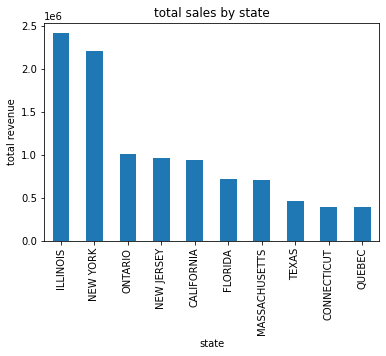

In [17]:
import matplotlib.pyplot as plt
state_gal=df.groupby("state")['trade_sales_gallons'].sum().sort_values(ascending=False).head(10)

state_gal.plot(kind='bar')
plt.xlabel("state")
plt.ylabel("total revenue")
plt.title("total sales by state")
plt.show()


In [52]:
text_cols=["Territory","Industry Sector","State/Province","Country","Product Segment","Product Group"]
for col in text_cols:
    if col in df.columns:
        df[col]=df[col].astype(str).str.strip().replace({"nan": np.nan, "None": np.nan})
num_cols=["Trade Sales Quantity","Trade Sales Gallons","Trade Sales Dollars (Group)"]
for col in num_cols:
    if col in df.columns:
        df[col]=pd.to_numeric(df[col],errors='coerce')

In [53]:
for col in num_cols:
    if col in df.columns:
        print("\n", col)
        print("Negatives:", (df[col] < 0).sum())
        print("Zeros:", (df[col] == 0).sum())
        print("Nulls:", df[col].isna().sum())
        print(df[col].describe())


 Trade Sales Quantity
Negatives: 6184
Zeros: 1273
Nulls: 0
count    170528.000000
mean        148.127443
std        1751.064050
min        -368.750000
25%           3.333333
50%          14.666667
75%          68.333333
max      289692.000000
Name: Trade Sales Quantity, dtype: float64

 Trade Sales Gallons
Negatives: 5758
Zeros: 5082
Nulls: 206
count    170322.000000
mean         88.210739
std         623.354954
min        -403.571429
25%           1.607143
50%           8.392857
75%          40.892857
max       56538.035714
Name: Trade Sales Gallons, dtype: float64

 Trade Sales Dollars (Group)
Negatives: 7253
Zeros: 537
Nulls: 0
count    1.705280e+05
mean     8.046745e+03
std      5.693534e+04
min     -9.617726e+05
25%      1.967644e+02
50%      9.329807e+02
75%      4.341726e+03
max      1.070011e+07
Name: Trade Sales Dollars (Group), dtype: float64


In [60]:
if "Territory" in df.columns:
    df["Territory_Name"] = df["Territory"].str.split(" - ").str[0]
    df["Territory_Type"] = df["Territory"].str.split(" - ").str[1]
    df["Territory_Type"] = df["Territory_Type"].fillna("GENERAL")
print(df.head()) 

# “The Territory field contained both the territory owner and territory type in a single string. 
# I split it into two structured columns to enable cleaner grouping, filtering, and analysis.”

   Year              Territory Industry Sector State/Province Country  \
0  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
1  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
2  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
3  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
4  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   

  Product Segment        Product Group  Trade Sales Quantity  \
0   COLOR SAMPLES        COLOR SAMPLES            -64.000000   
1      COMMERCIAL   CORONADO SPECIALTY              0.000000   
2      COMMERCIAL  ULTRA SPEC INTERIOR              0.333333   
3      COMMERCIAL  ULTRA SPEC INTERIOR              0.000000   
4       COMMODITY  SUPER HIDE MOOREPRO              7.000000   

   Trade Sales Gallons  Trade Sales Dollars (Group)  \
0            -2.158929                  -488.248889   
1             0.000000                     0.000000   
2          

In [56]:
if "State/Province" in df.columns:
    df["State_Clean"] = df["State/Province"].copy()

    # If value contains "NOT ASSIGNED" (e.g., "BM/NOT ASSIGNED"), mark as UNKNOWN
    df["State_Clean"] = df["State_Clean"].apply(
        lambda x: "UNKNOWN" if isinstance(x, str) and "NOT ASSIGNED" in x else x
    )
print(df.head())  
# Although they mean the same thing, converting multiple ‘Not assigned’ variants into a single ‘Unknown’ category 
# improves aggregation, visualization clarity, and GenAI response quality—while preserving the original data.”
# No — the Country column remains the source of truth The ‘Unknown’ label only standardizes missing state-level detail, 
# improving aggregation without losing geographic context.”

   Year              Territory Industry Sector State/Province Country  \
0  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
1  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
2  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
3  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
4  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   

  Product Segment        Product Group  Trade Sales Quantity  \
0   COLOR SAMPLES        COLOR SAMPLES            -64.000000   
1      COMMERCIAL   CORONADO SPECIALTY              0.000000   
2      COMMERCIAL  ULTRA SPEC INTERIOR              0.333333   
3      COMMERCIAL  ULTRA SPEC INTERIOR              0.000000   
4       COMMODITY  SUPER HIDE MOOREPRO              7.000000   

   Trade Sales Gallons  Trade Sales Dollars (Group)  \
0            -2.158929                  -488.248889   
1             0.000000                     0.000000   
2          

In [72]:
df["Is_Return"] = (
    (df["Trade Sales Quantity"] < 0) |
    (df["Trade Sales Gallons"] < 0) |
    (df["Trade Sales Dollars (Group)"] < 0)
)
print(df.head()) 

   Year              Territory Industry Sector State/Province Country  \
0  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
1  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
2  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
3  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
4  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   

  Product Segment        Product Group  Trade Sales Quantity  \
0   COLOR SAMPLES        COLOR SAMPLES            -64.000000   
1      COMMERCIAL   CORONADO SPECIALTY              0.000000   
2      COMMERCIAL  ULTRA SPEC INTERIOR              0.333333   
3      COMMERCIAL  ULTRA SPEC INTERIOR              0.000000   
4       COMMODITY  SUPER HIDE MOOREPRO              7.000000   

   Trade Sales Gallons  Trade Sales Dollars (Group)  \
0            -2.158929                  -488.248889   
1             0.000000                     0.000000   
2          

In [74]:
df["Sale_Type"] = df["Trade Sales Dollars (Group)"].apply(
    lambda x: "Revenue" if x > 0 else "Adjustment"
)
print(df['Sale_Type'])

0         Adjustment
1         Adjustment
2            Revenue
3         Adjustment
4            Revenue
             ...    
170523       Revenue
170524       Revenue
170525       Revenue
170526       Revenue
170527    Adjustment
Name: Sale_Type, Length: 170528, dtype: object


In [78]:
#“I added lightweight features like unit pricing to make insights more interpretable for business users.”
if "Trade Sales Dollars (Group)" in df.columns and "Trade Sales Gallons" in df.columns:
    df["Price_Per_Gallon"] = np.where(
        df["Trade Sales Gallons"] > 0,
        df["Trade Sales Dollars (Group)"] / df["Trade Sales Gallons"],
        np.nan
    )
df = df.dropna(subset=["Trade Sales Dollars (Group)"])
print(df.head())

   Year              Territory Industry Sector State/Province Country  \
0  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
1  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
2  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
3  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
4  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   

  Product Segment        Product Group  Trade Sales Quantity  \
0   COLOR SAMPLES        COLOR SAMPLES            -64.000000   
1      COMMERCIAL   CORONADO SPECIALTY              0.000000   
2      COMMERCIAL  ULTRA SPEC INTERIOR              0.333333   
3      COMMERCIAL  ULTRA SPEC INTERIOR              0.000000   
4       COMMODITY  SUPER HIDE MOOREPRO              7.000000   

   Trade Sales Gallons  Trade Sales Dollars (Group)  \
0            -2.158929                  -488.248889   
1             0.000000                     0.000000   
2          

In [76]:
if "Country" in df.columns:
    df["Market"] = np.where(df["Country"].eq("USA"), "USA", "INTERNATIONAL")
print(df.head())

   Year              Territory Industry Sector State/Province Country  \
0  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
1  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
2  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
3  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   
4  2024  ADAM NAGLE - ACE ONLY        HARDWARE        FLORIDA     USA   

  Product Segment        Product Group  Trade Sales Quantity  \
0   COLOR SAMPLES        COLOR SAMPLES            -64.000000   
1      COMMERCIAL   CORONADO SPECIALTY              0.000000   
2      COMMERCIAL  ULTRA SPEC INTERIOR              0.333333   
3      COMMERCIAL  ULTRA SPEC INTERIOR              0.000000   
4       COMMODITY  SUPER HIDE MOOREPRO              7.000000   

   Trade Sales Gallons  Trade Sales Dollars (Group)  \
0            -2.158929                  -488.248889   
1             0.000000                     0.000000   
2          

In [79]:
returns_dollars = df.loc[df["Trade Sales Dollars (Group)"] < 0, "Trade Sales Dollars (Group)"].sum()
print("Returns/Adjustments Dollars:", returns_dollars)

Returns/Adjustments Dollars: -25740833.819259256


In [80]:
market_rev = df.groupby("Market")["Trade Sales Dollars (Group)"].sum().sort_values(ascending=False)
print(market_rev)


Market
USA              1.170670e+09
INTERNATIONAL    2.015254e+08
Name: Trade Sales Dollars (Group), dtype: float64


In [81]:
seg_rev = df.groupby("Product Segment")["Trade Sales Dollars (Group)"].sum().sort_values(ascending=False).head(10)
print(seg_rev)


Product Segment
PREMIUM                6.014490e+08
COMMERCIAL             3.099363e+08
COLORANT               1.089017e+08
PRIMERS                9.189350e+07
SUPER PREMIUM          7.276360e+07
INDUSTRIAL COATINGS    6.966280e+07
COMMODITY              5.621332e+07
EXTERIOR STAINS        4.441662e+07
SPECIALTY              2.231199e+07
COLOR SAMPLES          1.206823e+07
Name: Trade Sales Dollars (Group), dtype: float64


In [82]:
state_rev = df.groupby("State_Clean")["Trade Sales Dollars (Group)"].sum().sort_values(ascending=False).head(10)
print(state_rev)


State_Clean
NEW YORK         2.006679e+08
ILLINOIS         1.827969e+08
CALIFORNIA       9.670255e+07
NEW JERSEY       9.085879e+07
ONTARIO          8.306108e+07
MASSACHUSETTS    7.504879e+07
FLORIDA          6.629578e+07
CONNECTICUT      3.951767e+07
TEXAS            3.907011e+07
QUEBEC           3.028753e+07
Name: Trade Sales Dollars (Group), dtype: float64


In [83]:
compare_states = df[df["State_Clean"].isin(["NEW YORK", "MASSACHUSETTS"])]

comp = compare_states.groupby("State_Clean")[["Trade Sales Dollars (Group)", "Trade Sales Gallons"]].sum()
print(comp)


               Trade Sales Dollars (Group)  Trade Sales Gallons
State_Clean                                                    
MASSACHUSETTS                 7.504879e+07         7.101662e+05
NEW YORK                      2.006679e+08         2.205650e+06


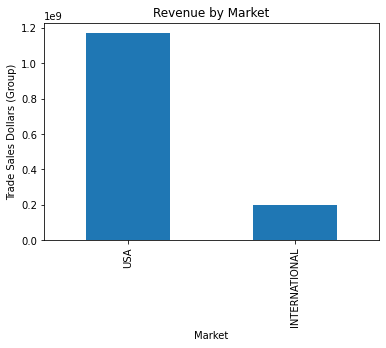

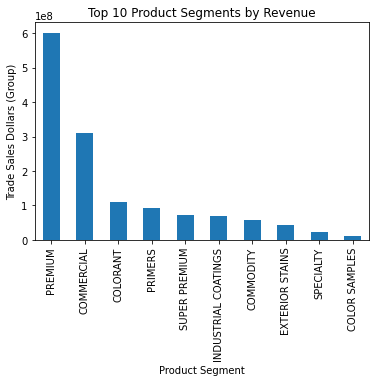

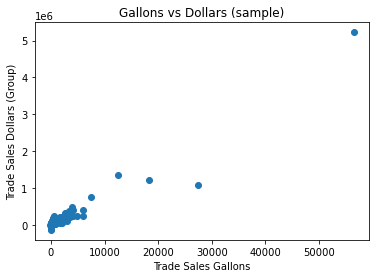

In [85]:
# Revenue by Market
market_rev = df.groupby("Market")["Trade Sales Dollars (Group)"].sum().sort_values(ascending=False)

import matplotlib.pyplot as plt

market_rev.plot(kind="bar")
plt.title("Revenue by Market")
plt.xlabel("Market")
plt.ylabel("Trade Sales Dollars (Group)")
plt.show()

# Top 10 Product Segments by Dollars
seg_rev = df.groupby("Product Segment")["Trade Sales Dollars (Group)"].sum().sort_values(ascending=False).head(10)

seg_rev.plot(kind="bar")
plt.title("Top 10 Product Segments by Revenue")
plt.xlabel("Product Segment")
plt.ylabel("Trade Sales Dollars (Group)")
plt.show()

# Top States by Dollars (using your cleaned state)
state_rev = df.groupby("State_Clean")["Trade Sales Dollars (Group)"].sum().sort_values(ascending=False).head(10)

# Scatter: Gallons vs Dollars (relationship)
sample = df.sample(5000, random_state=42)  # keep it fast
plt.scatter(sample["Trade Sales Gallons"], sample["Trade Sales Dollars (Group)"])
plt.title("Gallons vs Dollars (sample)")
plt.xlabel("Trade Sales Gallons")
plt.ylabel("Trade Sales Dollars (Group)")
plt.show()


count    159223.000000
mean        122.413832
std          65.560973
min           0.506627
25%          83.667266
50%         111.650165
75%         145.318119
max        1553.315556
Name: Price_Per_Gallon, dtype: float64
Product Segment
COLORANT               381.691239
SUPER PREMIUM          156.367654
SPECIALTY              143.675259
INDUSTRIAL COATINGS    134.005926
COLOR SAMPLES          131.328420
PREMIUM                123.954133
FLOORING POLYS         123.788115
LACQUERS               117.608296
EXTERIOR STAINS         97.207911
COMMERCIAL              84.047915
Name: Price_Per_Gallon, dtype: float64


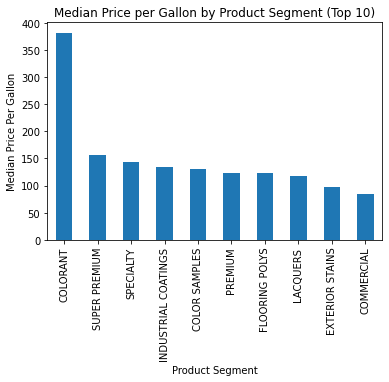

In [86]:
valid_price = df[(df["Trade Sales Gallons"] > 0) & (df["Trade Sales Dollars (Group)"] > 0)].copy()

print(valid_price["Price_Per_Gallon"].describe())

# Compare pricing by Product Segment
price_by_seg = valid_price.groupby("Product Segment")["Price_Per_Gallon"].median().sort_values(ascending=False).head(10)
print(price_by_seg)

price_by_seg.plot(kind="bar")
plt.title("Median Price per Gallon by Product Segment (Top 10)")
plt.xlabel("Product Segment")
plt.ylabel("Median Price Per Gallon")
plt.show()


# “I analyzed revenue by product segment to understand scale, and pricing per gallon to understand product positioning. 
# Together they show whether a segment wins through volume or through premium pricing.”
# “Some segments drive high revenue because of volume, while others have lower volume but higher pricing.
# Looking at both helps understand mix and pricing strategy.”


In [87]:
compare_states = df[df["State_Clean"].isin(["NEW YORK", "MASSACHUSETTS"])]

comp = compare_states.groupby("State_Clean")[["Trade Sales Dollars (Group)", "Trade Sales Gallons"]].sum()
print(comp)


               Trade Sales Dollars (Group)  Trade Sales Gallons
State_Clean                                                    
MASSACHUSETTS                 7.504879e+07         7.101662e+05
NEW YORK                      2.006679e+08         2.205650e+06


In [89]:
# “I performed EDA to understand scale, pricing, mix, and geographic performance.”
# “I ground the LLM on computed metrics and summaries from the dataset, not raw data.”

In [90]:
# Year-over-Year Growth Comparison between two states
def compare_states(df, state1, state2):
    # “Give me only rows where State is either state1 or state2”
    filtered_df = df[df["State_Clean"].isin([state1, state2])]
    # “Which state made more total money?”
    totals  = filtered_df.groupby("State_Clean")[["Trade Sales Dollars (Group)", "Trade Sales Gallons"]].sum().to_dict()
    
    # an empty dictionary to store  year over year growth results.
    yoy = {}
    for state in [state1, state2]:
    # Get yearly sales for the state
        state_data = filtered_df[filtered_df["State_Clean"] == state].groupby("Year")["Trade Sales Dollars (Group)"].sum().sort_index()
        if len(state_data) > 1:
            yoy[state] = (state_data.iloc[-1] - state_data.iloc[0]) / state_data.iloc[0] * 100
        else:
            yoy[state] = None
    return totals,yoy

# “I created a small analytics function that computes exact revenue and volume comparisons for any two states. 
# This serves as a deterministic truth layer, and the GenAI component only explains the results, not calculates them.”

In [ ]:
“I did not train a GenAI model.
I built a GenAI-powered analytics system where a deterministic Python layer computes results 
and 
an LLM is used only for explanation, with strict guardrails.”
“The chatbot interprets user intent, executes predefined analytics functions on the dataset, 
and optionally uses an LLM to explain the results in natural language.”